## Recommandation system environment setting

This is a virtual [FNAC](https://en.wikipedia.org/wiki/Fnac) recommandation system environment for simulating its users preferences and orders.

<img src="imgs/Fnac_Logo.png" width="200">


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib inline

In [58]:
category_dict = {}
category_dict["Musique, CD, Vinyles"] = ["Variété française", "Pop, Rock, Indé", "Compilations", "Hard Rock, Métal", "R&B, Soul, Funk"]
category_dict["Jeux Vidéo, Consoles"] = ["Consoles PS4", "Jeux PS4", "Contenus PS4", "Accessoires PS4", "Cartes cadeau PS4"]
category_dict["Films, Séries TV, DVD, Blu-Ray"] = ["Comdédie", "Emotions", "Grands Classiques", "Action", "Frantastique"]
category_dict["Informatique, Tablettes"] = ["Samsung Galaxy", "iPad", "Accessoires iPad", "Macbook", "PC portable"]
category_dict["Smartphones & Objets connectés"] = ["iPhone", "Samsung", "Huawei", "Apple Watch", "Xiaomi"]
category_dict["Photo, Caméras, Tirages photo"] = ["Caméra Canon", "Caméra Sony", "Caméra Nikon", "Caméra DJI", "Caméra GoPro"]
category_dict["Son, Casques, Enceintes"] = ["Google Home", "Casque Bose", "Casque Beats", "Casque JBL", "Casque Sony"]
category_dict["Electroménager, Cuisine"] = ["Aspirateur robot", "Chauffage", "Robot cuiseur", "Mojoteur", "Brosse à dents électrique"]

reco_length = 5
seed = 81

In [87]:
def generate_random_category(n, m):
    category_dict = {}
    for i in range(n):
        category_dict[i] = [str(i) + "-" + str(x) for x in list(range(m))]
    return category_dict


In [3]:
#category_dict = generate_random_category(10, 20)

In [ ]:
# category_dict = generate_random_category(4, 3)
# reco_length = 5
# seed = 91

In [212]:
category_dict = generate_random_category(4, 4)
reco_length = 5
seed = 96

In [257]:
category_dict = generate_random_category(10, 20)
reco_length = 5
seed = 96

In [258]:
def count(dictionary):
    return sum(len(dictionary[x]) for x in dictionary.keys())

count(category_dict)

200

In [259]:
category_dict

{0: ['0-0',
  '0-1',
  '0-2',
  '0-3',
  '0-4',
  '0-5',
  '0-6',
  '0-7',
  '0-8',
  '0-9',
  '0-10',
  '0-11',
  '0-12',
  '0-13',
  '0-14',
  '0-15',
  '0-16',
  '0-17',
  '0-18',
  '0-19'],
 1: ['1-0',
  '1-1',
  '1-2',
  '1-3',
  '1-4',
  '1-5',
  '1-6',
  '1-7',
  '1-8',
  '1-9',
  '1-10',
  '1-11',
  '1-12',
  '1-13',
  '1-14',
  '1-15',
  '1-16',
  '1-17',
  '1-18',
  '1-19'],
 2: ['2-0',
  '2-1',
  '2-2',
  '2-3',
  '2-4',
  '2-5',
  '2-6',
  '2-7',
  '2-8',
  '2-9',
  '2-10',
  '2-11',
  '2-12',
  '2-13',
  '2-14',
  '2-15',
  '2-16',
  '2-17',
  '2-18',
  '2-19'],
 3: ['3-0',
  '3-1',
  '3-2',
  '3-3',
  '3-4',
  '3-5',
  '3-6',
  '3-7',
  '3-8',
  '3-9',
  '3-10',
  '3-11',
  '3-12',
  '3-13',
  '3-14',
  '3-15',
  '3-16',
  '3-17',
  '3-18',
  '3-19'],
 4: ['4-0',
  '4-1',
  '4-2',
  '4-3',
  '4-4',
  '4-5',
  '4-6',
  '4-7',
  '4-8',
  '4-9',
  '4-10',
  '4-11',
  '4-12',
  '4-13',
  '4-14',
  '4-15',
  '4-16',
  '4-17',
  '4-18',
  '4-19'],
 5: ['5-0',
  '5-1',
  '5-2',


In [260]:
class Clients:
    def __init__(self, n_client, category_dict, desire_threshold=3, seed=None):
        self.category_dict = category_dict
        self.category_list = list(category_dict.keys())
        self.n_client = n_client
        self.n_category = len(category_dict.keys())
        self.n_commodity = count(category_dict)
        
        self.buy_threshold_list = [desire_threshold] * n_client
        self.cart_threshold_list = [desire_threshold*0.8] * n_client
        self.click_threshold_list = [desire_threshold*0.6] * n_client
        
        
        self.preference_matrix = np.zeros((n_client, self.n_commodity))
        self.desire_matrix = copy.copy(self.preference_matrix)
        
        self.reward_history = []
        self.revenue_history = []
        self.regret_history = []  # only revenue 
        self.regret_moreinfo_history = [] # revenue, cart, click
        self.reward_sum_each_step = []
        
        self.seed = seed
        self.generate_client_distribution()
        
    def generate_client_distribution(self):
        if self.seed != None:
            np.random.seed(self.seed)
        proba_category = np.random.uniform(0, 0.9, (self.n_client, self.n_category))
        proba_commodity_list = []
        for j in range(proba_category.shape[1]):
            #print('---aaa---', np.expand_dims(proba_category[:,j],1).shape)
            proba_commodity_list.append(np.repeat(np.expand_dims(proba_category[:,j],1), len(self.category_dict[self.category_list[j]]), axis=1))
        self.preference_matrix = np.hstack(proba_commodity_list)
        #print(proba_commodity_list[0].shape)
        #print(proba_commodity_list[1].shape)
        #print(self.proba_commodity.shape)
        self.preference_matrix += np.random.uniform(0, 0.1, (self.n_client, self.n_commodity))
        return
    
    def get_clients(self, n):
        return np.random.choice(list(range(self.n_client)), n, replace=False)
    
    def update_desire(self, client, rate_rise=None):
#         if rate_decay is not None:
#             self.desire_matrix *= 1 - rate_decay
        
        # if a commodity's desire has been over the thresholf for a long time but not buy things at our site,
        # the client may probably buy it somewhere else, so its desire will decrease to 0
        for i in range(len(self.desire_matrix[client])):
            if self.desire_matrix[client][i] > 3*self.buy_threshold_list[client]:
                self.desire_matrix[client][i] = 0  
        
        if rate_rise is None:
            rate_rise = np.mean(self.desire_threshold_list) * 0.5
        if rate_rise < 0:
            rate_rise = 0
        self.desire_matrix[client] += rate_rise * self.preference_matrix[client]
    
    def get_waiting_list(self, client):
        client_desire = self.desire_matrix[client]
        buy = np.array(np.where(client_desire>self.buy_threshold_list[client])[0])
        cart = np.array(np.where(client_desire>self.cart_threshold_list[client])[0])
        click = np.array(np.where(client_desire>self.click_threshold_list[client])[0])
        #print('click', click)
        
        for i in range(len(click)):
            if click[i] in cart:
                click[i] = 0
        
        for i in range(len(cart)):
            if cart[i] in buy:
                cart[i] = 0
        
        waiting_list = [buy, cart, click]
        
        return waiting_list
    
    def return_command(self, client, recommandation_list):
        client_waiting_list = self.get_waiting_list(client)[0]
        command_list = np.array([x for x in recommandation_list if x in client_waiting_list])
                
        
        print('client_waiting_list',client_waiting_list)
        print('command_list',command_list)
        return command_list
    
    def return_cart(self, client, recommandation_list):
        client_waiting_list = self.get_waiting_list(client)[1]
        cart_list = np.array([x for x in recommandation_list if x in client_waiting_list])
                
        
        print('client_waiting_list', client_waiting_list)
        print('cart_list', cart_list)
        return cart_list
    
    def return_click(self, client, recommandation_list):
        client_waiting_list = self.get_waiting_list(client)[0]
        click_list = np.array([x for x in recommandation_list if x in client_waiting_list])
                
        
        print('client_waiting_list',client_waiting_list)
        print('click_list',click_list)
        return click_list
    
#     def get_reward(self, client, recommandation_list):
#         articles_bought = self.return_command(client, recommandation_list)
#         self.reward_history.append(len(articles_bought))
#         return len(articles_bought)
    
    def do_purchase(self, client, command_list):
        for c in command_list:
            self.desire_matrix[client][c] = 0


    def get_reward(self, client, recommandation_list, articles_bought, articles_cart, articles_click):
        print('recommandation_list', recommandation_list)
        #articles_bought = self.return_command(client, recommandation_list)
        reward_list = [0]*len(recommandation_list)
        for a in articles_bought:
            index = np.where(recommandation_list==a)[0][0]
            #print('---aaa---', index)
            reward_list[index] += 1
            
        for a in articles_cart:
            index = np.where(recommandation_list==a)[0][0]
            #print('---aaa---', index)
            reward_list[index] += 0.7
            
        for a in articles_click:
            index = np.where(recommandation_list==a)[0][0]
            #print('---aaa---', index)
            reward_list[index] += 0.2
            
        #self.reward_history.append(reward_list) 
        #self.reward_sum_each_step.append(sum(reward_list))
        #print('reward_list', reward_list)
        return reward_list
    
    def get_revenue(self, client, recommandation_list, articles_bought):
        print('recommandation_list', recommandation_list)
        #articles_bought = self.return_command(client, recommandation_list)
        revenue_list = [0]*len(recommandation_list)
        for a in articles_bought:
            index = np.where(recommandation_list==a)[0][0]
            #print('---aaa---', index)
            revenue_list[index] += 1
            
        #self.reward_history.append(reward_list) 
        #self.reward_sum_each_step.append(sum(reward_list))
        #print('reward_list', reward_list)
        return revenue_list
        
    def get_regret(self, client, recommandation_list, reward_list):
        #articles_bought = self.return_command(client, recommandation)
        articles_wanted_to_buy = self.get_waiting_list(client)[0]
        #regret = min(len(articles_wanted_to_buy), len(recommandation_list)) - sum(self.get_reward(client, recommandation_list))
        regret = min(len(articles_wanted_to_buy), len(recommandation_list)) - sum(reward_list)
        #self.regret_history.append(regret)
        return regret
    
    def update_history(self, reward_list, regret, revenue, regret_moreinfo=None):
        self.reward_history.append(reward_list) 
        self.reward_sum_each_step.append(sum(reward_list))
        self.revenue_history.append(revenue)
        self.regret_history.append(regret)
        if regret_moreinfo != None:
            self.regret_moreinfo_history.append(regret_moreinfo)

In [261]:
np.where(np.array([1,2,3,4,3])==3)[0][0]

2

In [262]:
class AgentBase():
    def __init__(self, commodity_number, recommendation_length):
        raise NotImplementedError()
    
    def recommend(self, online_client):
        raise NotImplementedError()
    
    def update_state(self, recommendation_chosen, reward):
        raise NotImplementedError()
        
    def get_agent_name(self):
        return self.name

In [263]:
class RandomAgent(AgentBase):
    def __init__(self, user_number, commodity_number, recommendation_length=5):
        self.name = 'random agent'
        self.user_number = user_number
        self.commodity_number = commodity_number
        self.recommendation_length = recommendation_length
        self.recommendation_history = []
        self.reward_history = []
        self.reward_sum_each_step = []
        self.t = 1
        
        self.purchase_history = []
        for i in range(self.user_number):
            self.purchase_history.append([])
        
    def recommend(self, client_id):
        return np.random.choice(range(self.commodity_number), self.recommendation_length, replace=False)
    
    def update_state(self, client_id, recommendations_chosen, reward_list, articles_bought):
        
        self.t += 1
        self.purchase_history[client_id].append(articles_bought)
        
        self.recommendation_history.append(recommendations_chosen)
        self.reward_history.append(reward_list)
        self.reward_sum_each_step.append(sum(reward_list))

In [264]:
class AdaptedRandomAgent(AgentBase):
    def __init__(self, user_number, commodity_number, recommendation_length=5):
        self.name = 'random agent'
        self.user_number = user_number
        self.commodity_number = commodity_number
        self.recommendation_length = recommendation_length
        self.recommendation_history = []
        self.reward_history = []
        self.reward_sum_each_step = []
        self.t = 1
        
        self.purchase_history = []
        for i in range(self.user_number):
            self.purchase_history.append([])
        
    def recommend(self, client_id):
        recently_purchased_commodities = set()
        for i in [-1,-2, -3]: 
            if len(self.purchase_history[client_id]) >= -i:
                recently_purchased_commodities.update(self.purchase_history[client_id][i])
        
        available_commodity_set = set(range(self.commodity_number)) -recently_purchased_commodities 
        
        return np.random.choice(list(available_commodity_set), self.recommendation_length, replace=False)
    
    def update_state(self, client_id, recommendations_chosen, reward_list, articles_bought):
        
        self.t += 1
        self.purchase_history[client_id].append(articles_bought)
        
        self.recommendation_history.append(recommendations_chosen)
        self.reward_history.append(reward_list)
        self.reward_sum_each_step.append(sum(reward_list))

In [265]:
class UCBAgent(AgentBase):
    def __init__(self, user_number, commodity_number, recommendation_length=5, constant=1):
        self.name = 'ucb agent'
        self.commodity_number = commodity_number
        self.user_number = user_number
        self.recommendation_length = recommendation_length
        self.recommendation_history = []
        self.reward_history = []
        self.reward_sum_each_step = []
        
        self.purchase_history = []
        for i in range(self.user_number):
            self.purchase_history.append([])
        
        self.n_by_commodity = np.zeros((user_number, commodity_number))  # How many times that a commodity has been recomended to a user
        self.reward_by_commodity = np.zeros((user_number, commodity_number))  # How much reward has been given to a specific user by a specific commodity
        self.constant = constant
        self.t = 1
        
    def recommend(self, client_id):
        ucbs = [self.reward_by_commodity[client_id, a] / self.n_by_commodity[client_id, a] 
                + self.constant*np.sqrt(np.log(self.t)/self.n_by_commodity[client_id, a]) 
                for a in range(self.commodity_number)]
        ucbs = np.array(ucbs)
        return ucbs.argsort()[-self.recommendation_length:][::-1] # select the top self.recommendation_length articles, return their indices by order
        
    def update_state(self, client_id, recommendations_chosen, reward_list, articles_bought):
        for i, a in enumerate(recommendations_chosen):
            self.n_by_commodity[client_id, a] += 1
            self.reward_by_commodity[client_id, a] += reward_list[i]
        
        self.t += 1
        self.purchase_history[client_id].append(articles_bought)
        
        self.recommendation_history.append(recommendations_chosen)
        self.reward_history.append(reward_list)
        self.reward_sum_each_step.append(sum(reward_list))

In [266]:
class UCBAgent_Adapted(AgentBase):
    def __init__(self, user_number, commodity_number, recommendation_length=5, constant=1):
        self.name = 'adapted ucb agent'
        self.commodity_number = commodity_number
        self.user_number = user_number
        self.recommendation_length = recommendation_length
        self.recommendation_history = []
        self.reward_history = []
        self.reward_sum_each_step = []
        
        self.purchase_history = []
        for i in range(self.user_number):
            self.purchase_history.append([])
        
        self.n_by_commodity = np.zeros((user_number, commodity_number))  # How many times that a commodity has been recomended to a user
        self.reward_by_commodity = np.zeros((user_number, commodity_number))  # How much reward has been given to a specific user by a specific commodity
        self.constant = constant
        self.t = 1
        
    def recommend(self, client_id):
        ucbs = [self.reward_by_commodity[client_id, a] / self.n_by_commodity[client_id, a] 
                + self.constant*np.sqrt(np.log(self.t)/self.n_by_commodity[client_id, a]) 
                for a in range(self.commodity_number)]
        ucbs = np.array(ucbs)
        
        recommend_order = ucbs.argsort()[::-1]
        recently_purchased_commodities = set()
        for i in [-1,-2, -3]: 
            if len(self.purchase_history[client_id]) >= -i:
                recently_purchased_commodities.update(self.purchase_history[client_id][i])
        #print('recently_purchased_commodities', recently_purchased_commodities)
        #print('recommend_order', recommend_order)
        
        recommendation_list = []
        for i in range(len(recommend_order)):
            if recommend_order[i] not in recently_purchased_commodities:
                recommendation_list.append(recommend_order[i])
            if len(recommendation_list) == self.recommendation_length:
                break
        
        return recommendation_list
        
    def update_state(self, client_id, recommendations_chosen, reward_list, articles_bought):
        for i, a in enumerate(recommendations_chosen):
            self.n_by_commodity[client_id, a] += 1
            self.reward_by_commodity[client_id, a] += reward_list[i]
        
        self.t += 1
        self.purchase_history[client_id].append(articles_bought)
        
        self.recommendation_history.append(recommendations_chosen)
        self.reward_history.append(reward_list)
        self.reward_sum_each_step.append(sum(reward_list))
        

In [267]:
class ThompsonAgent(AgentBase):
    def __init__(self, user_number, commodity_number, recommendation_length=5):
        self.name = 'thompson sampling agent'
        self.commodity_number = commodity_number
        self.user_number = user_number
        self.recommendation_length = recommendation_length
        self.recommendation_history = []
        self.reward_history = []
        self.reward_sum_each_step = []
        
        self.purchase_history = []
        for i in range(self.user_number):
            self.purchase_history.append([])
         
        self.alpha_by_commodity = np.ones((user_number, commodity_number))
        self.beta_by_commodity = np.ones((user_number, commodity_number))
        
        self.t = 1
        
    def recommend(self, client_id):
        # arm selection
        samples = [np.random.beta(self.alpha_by_commodity[client_id, arm], 
                            self.beta_by_commodity[client_id, arm], 
                            size=1) for arm in range(self.commodity_number)]
             
        samples = np.squeeze(np.array(samples))
        return samples.argsort()[-self.recommendation_length:][::-1] # select the top self.recommendation_length articles, return their indices by order
        
    def update_state(self, client_id, recommendations_chosen, reward_list, articles_bought):
        #recommendations_chosen_set = set(reward_list)
        
        for i, a in enumerate(recommendations_chosen):
            self.alpha_by_commodity[client_id, a] += reward_list[i]
            self.beta_by_commodity[client_id, a] += 1 - reward_list[i]
        
        
#         for a in range(self.commodity_number):
#             if a in recommendations_chosen_set:
#                 self.alpha_by_commodity[client_id, a] += 1
#             else:
#                 self.beta_by_commodity[client_id, a] += 1
        
        
        self.t += 1
        self.purchase_history[client_id].append(articles_bought)
        
        self.recommendation_history.append(recommendations_chosen)
        self.reward_history.append(reward_list)
        self.reward_sum_each_step.append(sum(reward_list))

In [268]:
class AdaptedThompsonAgent(AgentBase):
    def __init__(self, user_number, commodity_number, recommendation_length=5):
        self.name = 'thompson sampling agent'
        self.commodity_number = commodity_number
        self.user_number = user_number
        self.recommendation_length = recommendation_length
        self.recommendation_history = []
        self.reward_history = []
        self.reward_sum_each_step = []
        
        self.purchase_history = []
        for i in range(self.user_number):
            self.purchase_history.append([])
         
        self.alpha_by_commodity = np.ones((user_number, commodity_number))
        self.beta_by_commodity = np.ones((user_number, commodity_number))
        
        self.t = 1
        
    def recommend(self, client_id):
        # arm selection
        samples = [np.random.beta(self.alpha_by_commodity[client_id, arm], 
                            self.beta_by_commodity[client_id, arm], 
                            size=1) for arm in range(self.commodity_number)]
             
        samples = np.squeeze(np.array(samples))
        
        recommend_order = samples.argsort()[::-1]
        recently_purchased_commodities = set()
        for i in [-1,-2,-3]: 
            if len(self.purchase_history[client_id]) >= -i:
                recently_purchased_commodities.update(self.purchase_history[client_id][i])
        print('recently_purchased_commodities', recently_purchased_commodities)
        print('recommend_order', recommend_order)
        
        recommendation_list = []
        for i in range(len(recommend_order)):
            if recommend_order[i] not in recently_purchased_commodities:
                recommendation_list.append(recommend_order[i])
            if len(recommendation_list) == self.recommendation_length:
                break
        
        return recommendation_list
        
    def update_state(self, client_id, recommendations_chosen, reward_list, articles_bought):
        #recommendations_chosen_set = set(reward_list)
        
        for i, a in enumerate(recommendations_chosen):
            self.alpha_by_commodity[client_id, a] += reward_list[i]
            self.beta_by_commodity[client_id, a] += 1 - reward_list[i]
        
        
#         for a in range(self.commodity_number):
#             if a in recommendations_chosen_set:
#                 self.alpha_by_commodity[client_id, a] += 1
#             else:
#                 self.beta_by_commodity[client_id, a] += 1
        
        
        self.t += 1
        self.purchase_history[client_id].append(articles_bought)
        
        self.recommendation_history.append(recommendations_chosen)
        self.reward_history.append(reward_list)
        self.reward_sum_each_step.append(sum(reward_list))

In [269]:
def run(env, agent, n):
    for i in range(n):
        print('round', i)
        active_clients = env.get_clients(1)
        
        for c in active_clients:
            env.update_desire(c, rate_rise=0.5)
            recomedation_list = agent.recommend(c)
            articles_buy = env.return_command(c, recomedation_list)
            articles_cart = env.return_cart(c, recomedation_list)
            articles_click = env.return_click(c, recomedation_list)
            
            revenue_list = env.get_revenue(c, recomedation_list, articles_buy)   
            
            reward_list = env.get_reward(c, recomedation_list, articles_buy, articles_cart, articles_click)
            #regret = env.get_regret(c, recomedation_list, reward_list)
            regret = env.get_regret(c, recomedation_list, revenue_list) # we only consider the articles bought, not clicked or put into cart
            regret_moreinfo = env.get_regret(c, recomedation_list, reward_list)
            
            print('regret', regret, '\tregret-moreinfo', regret_moreinfo)
            env.do_purchase(c, articles_buy)
            env.update_history(reward_list, regret, revenue_list, regret_moreinfo)
            agent.update_state(c, recomedation_list, reward_list, articles_buy)

In [270]:
C = Clients(n_client=1, category_dict=category_dict, seed=seed)
print(C.n_commodity)


200


In [271]:
C1 = copy.deepcopy(C)
random_agent = RandomAgent(C1.n_client, C1.n_commodity, recommendation_length=reco_length)
run(C1, random_agent, 100)

round 0
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [ 57 124  41  36  68]
recommandation_list [ 57 124  41  36  68]
regret 0 	regret-moreinfo 0
round 1
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [108 114  88 149 133]
recommandation_list [108 114  88 149 133]
regret 0 	regret-moreinfo 0
round 2
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [172  63  88  52 141]
recommandation_list [172  63  88  52 141]
regret 0 	regret-moreinfo 0
round 3
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [ 39 111 101 142  85]
recommandation_list [ 39 111 101 142  85]
regret 0 	regret-moreinfo 0
round 4
client_waiting_list []
command_list []
client_waiting_list []
ca

regret 3 	regret-moreinfo 2.6
round 26
client_waiting_list [  0   1   2   3   4   7   8   9  10  11  12  13  14  16  17  23  24  25
  26  27  28  35  36  38  40  44  48  50  52  56  69  72  74  76  80  81
  82  84  86  87  88  90  91  94  95  97  99 140 141 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 164 165 166 167 168
 169 170 172 173 174 175 176 177 178 179]
command_list [1]
client_waiting_list [  0   0   0   0   0   5   6   0   0   0   0   0   0   0   0  15   0   0
  18  20  21   0   0   0   0   0   0  29  31  34   0   0   0  39   0   0
   0   0   0   0  61  63  64  66   0  71   0  73   0   0   0   0   0   0
   0   0   0  89   0   0   0   0   0   0 109 114 115 119   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0]
cart_list [39 15]
client_waiting_list [  0   1   2   3   4   7   8   9  10  11  12  13  14  16  17  23  24  25
  26  27  28  35  36  38  40  44  48  50

regret 3 	regret-moreinfo 1.9000000000000004
round 46
client_waiting_list [  2   3   4   5   6   8   9  10  13  15  16  18  19  23  24  25  26  27
  35  37  38  39  42  44  46  47  49  50  51  53  54  58  61  65  69  72
  73  74  76  77  78  80  81  83  86  87  88  90  91  92  93  94  95  96
  97  98  99 101 102 103 104 106 107 108 110 111 112 114 115 116 117 118
 119 121 123 124 131 132 135 138 139 140 141 142 143 144 145 146 147 148
 149 151 152 154 155 156 157 159 160 161 162 163 164 165 167 168 169 172
 173 174 175 177 178 190]
command_list [ 53  98  37 115]
client_waiting_list [  0   0   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0   0
   0   0   0   0   0  40   0   0   0   0  48   0   0   0  52   0   0   0
   0   0  66   0   0   0   0   0   0   0   0   0  82   0  84   0   0   0
   0   0   0   0   0   0   0   0   0   0 100   0   0   0   0 105   0   0
   0   0   0   0 113   0   0   0   0   0   0   0   0   0 125 126 130   0
   0 133 134   0 136 137   0   0   0   0   0  

regret 3 	regret-moreinfo 2.6
round 63
client_waiting_list [  0   1   5   7   8   9  12  13  14  16  17  18  22  23  24  25  26  27
  28  29  30  31  32  33  35  37  38  39  41  42  43  44  46  47  48  51
  53  55  56  57  58  60  61  62  65  68  69  70  72  73  74  79  80  81
  82  83  84  85  86  87  89  93  94  96  98 100 102 103 104 105 106 107
 108 110 111 112 113 114 116 117 118 119 120 123 124 125 126 129 130 131
 132 133 136 137 138 140 147 149 150 151 152 153 155 158 159 160 161 162
 167 168 169 170 171 172 174 175 177 179 181 183 186 187 188 190 191 197]
command_list [187]
client_waiting_list [  0   0   0   0   0   0  11   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  78   0
   0   0   0   0   0   0   0   0  88   0   0   0  95   0  97   0  99   0
   0   0   0   0   0   0   0 109   0   0   0   0   0   0   0   0   0   0
 122   0   0   0   0 128 

regret 1 	regret-moreinfo 0.20000000000000018
round 77
client_waiting_list [  0   4   5  10  11  12  14  18  19  20  21  22  23  28  30  32  33  34
  36  37  38  40  41  42  43  44  45  48  49  50  52  53  55  56  57  58
  59  60  61  62  63  64  66  67  68  71  74  75  77  78  79  80  81  82
  84  86  87  88  89  90  91  94  97  98  99 100 103 104 105 106 107 110
 111 112 113 114 115 119 120 122 123 126 129 130 131 132 136 137 140 141
 142 144 145 146 147 148 149 152 154 155 156 157 159 160 161 162 163 164
 165 166 168 169 172 173 174 175 176 178 180 183 185 186 188 190 191 197]
command_list [141  94 174   0]
client_waiting_list [  0   0   0   0   0   0   0  15   0   0   0   0   0   0   0  29   0  31
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  54
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73   0   0   0
   0   0   0   0   0   0  85   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127  

client_waiting_list [  2   4   9  10  11  15  17  19  20  22  23  24  25  26  27  28  29  30
  31  32  33  35  37  38  39  41  42  43  44  46  47  48  51  53  55  57
  58  60  61  62  65  68  70  72  73  76  78  79  82  83  85  90  92  93
  94  95  98 100 103 104 105 106 107 110 111 113 115 120 122 123 126 129
 130 132 137 142 143 146 148 150 151 153 154 157 158 160 162 164 165 166
 167 169 170 175 176 177 178 179 180 186 188 190 191 194 197 199]
command_list [166  95  83 191]
client_waiting_list [  0   3   0   6   8   0   0   0  13   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  40   0   0   0   0   0   0
   0   0   0   0   0   0  59   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  86  87  89   0   0   0   0   0   0   0 101   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 135   0 141   0   0 144
   0   0   0   0   0   0 155   0   0   0   0   0   0   0   0   0   0 174
   0   0   0   0   0   0   0   0   0   0   0 195   0   0]
ca

regret 1 	regret-moreinfo 0.20000000000000018


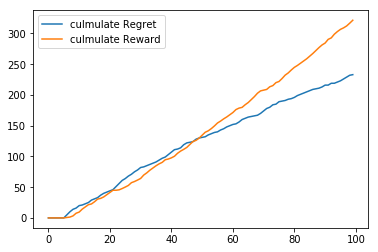

In [272]:
plt.plot(np.cumsum(C1.regret_history))
plt.plot(np.cumsum(C1.reward_sum_each_step))
plt.legend(["culmulate Regret", "culmulate Reward"])

In [273]:
len(C1.reward_sum_each_step)

100

In [274]:
C2 = copy.deepcopy(C)
ucb_agent = UCBAgent(C2.n_client, C2.n_commodity, recommendation_length=reco_length)
run(C2, ucb_agent, 100)

round 0
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [199  62  72  71  70]
recommandation_list [199  62  72  71  70]
regret 0 	regret-moreinfo 0
round 1
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [99 76 74 73 69]
recommandation_list [99 76 74 73 69]
regret 0 	regret-moreinfo 0
round 2
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [ 0  7 78 77  1]
recommandation_list [ 0  7 78 77  1]
regret 0 	regret-moreinfo 0
round 3
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [105   8  81  80  79]
recommandation_list [105   8  81  80  79]
regret 0 	regret-moreinfo 0
round 4
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_wa

/home/dongwenjian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/dongwenjian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


 2 	regret-moreinfo 1.4000000000000004
round 21
client_waiting_list [  9  11  14  17  19  23  24  27  28  32  33  37  38  39  40  41  42  43
  44  45  50  51  60  62  65  66  67  68  70  74  75  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  98  99 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179]
command_list [50]
client_waiting_list [ 0  1  2  3  4  7  8  0 10  0 12 13  0 16  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 47 49  0  0 53  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 97  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]
cart_list []
client_waiting_list [  9  11  14  17  19  23  24  27  28  32  33  37  38  39  40  41  42  43
  44  45  50  51  60  62  65  66  67  68  70  74  75  77  78  79  80  81
  82  83  84  85  86

client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  20  21  22  23  24  27  28  29  30  31  38  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  64  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  87  88  89
  90  91  93  95  96  97  99 101 104 109 114 115 116 118 119 121 124 127
 132 140 141 143 144 145 146 147 148 150 152 156 158 161 162 163]
command_list []
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  39   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  63   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 100   0 102 103   0 106 107 108   0
 110 111 112   0   0   0 117   0   0   0 123   0 125   0 131   0 135 138
 139   0   0   0   0   0   0   0   0   0 151   0   0   0 159 160   0   0
  

client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  25  28  30  31  32  36  38  39  40  42  43  44  45  48
  49  50  51  52  53  54  60  61  62  64  66  68  70  71  72  73  74  75
  77  78  79  83  84  85  86  89  90  92  93  95  96  97  98 100 101 102
 103 104 105 106 107 108 109 111 112 113 115 116 117 118 119 120 121 123
 124 125 126 127 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 153 155 157 160 161 162 167 168 171 172 173
 174 175 176 178 181 183 184 186 187 196 197]
command_list [167  38  66 162]
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  23   0   0   0   0   0  34   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  55  56  57  58  59   0   0   0   0   0
  67   0   0   0   0   0   0   0   0   0   0  80  81   0   0   0   0  87
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   

client_waiting_list [  0   1   3   4   5   6   7  15  18  19  20  21  22  25  26  28  29  30
  31  32  35  37  39  43  44  45  47  48  50  51  52  54  55  56  59  60
  61  62  63  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  84  86  87  88  89  91  93  98  99 100 101 102 103 104 105
 106 107 108 109 111 112 113 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 146 149 150
 151 152 153 154 155 156 162 163 166 167 168 169 170 172 173 175 176 177
 178 179 180 181 183 184 185 186 187 188 189 191 192 193 196 197]
command_list [ 50  30 173]
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  27   0   0
   0   0   0   0  36   0   0  41   0   0   0   0   0   0   0   0   0   0
   0  57  58   0   0   0   0   0  64   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  92   0  94
  97   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

client_waiting_list [  8   9  10  11  12  13  14  17  19  24  26  27  28  31  32  33  34  35
  37  38  39  41  42  47  49  53  56  57  58  59  61  63  65  66  67  68
  69  71  72  73  76  80  81  82  83  84  85  86  87  88  89  90  92  93
  94  95  96  98  99 100 101 102 103 104 105 106 107 108 109 111 112 113
 114 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 142 143 144 146 147 148 149 150 151 154
 155 157 158 159 163 167 168 169 173 174 175 178 180 181 183 184 185 186
 187 188 189 191 192 193 194 196 197 199]
click_list [47 66 59 58 57]
recommandation_list [47 66 59 58 57]
recommandation_list [47 66 59 58 57]
regret 0 	regret-moreinfo -1.0
round 94
client_waiting_list [  8   9  10  11  12  13  14  17  19  23  24  26  28  31  32  33  35  37
  38  39  41  42  49  53  56  61  63  65  67  68  69  71  72  73  76  80
  81  82  83  84  85  86  87  88  89  90  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 111 1

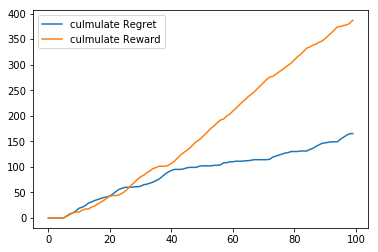

In [275]:
plt.plot(np.cumsum(C2.regret_history))
plt.plot(np.cumsum(C2.reward_sum_each_step))
plt.legend(["culmulate Regret", "culmulate Reward"])

In [276]:
C3 = copy.deepcopy(C)
ucb_adapted_agent = UCBAgent_Adapted(C3.n_client, C3.n_commodity, recommendation_length=reco_length)
run(C3, ucb_adapted_agent, 100)

round 0
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [199, 62, 72, 71, 70]
recommandation_list [199, 62, 72, 71, 70]
regret 0 	regret-moreinfo 0
round 1
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [99, 76, 74, 73, 69]
recommandation_list [99, 76, 74, 73, 69]
regret 0 	regret-moreinfo 0
round 2
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [0, 7, 78, 77, 1]
recommandation_list [0, 7, 78, 77, 1]
regret 0 	regret-moreinfo 0
round 3
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [105, 8, 81, 80, 79]
recommandation_list [105, 8, 81, 80, 79]
regret 0 	regret-moreinfo 0
round 4
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
c

/home/dongwenjian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/dongwenjian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


 1 	regret-moreinfo 0.20000000000000018
round 20
client_waiting_list [ 11  19  23  24  27  28  31  32  33  34  35  37  38  39  40  41  42  43
  44  45  50  51  56  58  59  60  61  62  63  64  65  66  67  68  70  71
  72  73  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  99 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179]
command_list [59 58 56]
client_waiting_list [ 2  7  8  9 10  0 12 13 14 16 17  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 97 98  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
cart_list []
client_waiting_list [ 11  19  23  24  27  28  31  32  33  34  35  37  38  39  40  41  42  43
  44  45  50  51  56  58  59  60  61  6

recommandation_list [31, 192, 190, 188, 187]
regret 4 	regret-moreinfo 3.1
round 40
client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  23  24  27  28  30  38  39  41  42  43  44  45  50  51  52  54  55  56
  57  58  59  60  61  62  63  64  70  71  72  73  74  75  77  78  79  80
  81  82  83  84  85  87  88  89  90  91  93  95  96  97  99 101 102 103
 104 108 109 110 114 115 116 118 119 121 123 124 127 131 132 140 141 143
 144 145 146 147 148 150 151 152 156 158 159 160 161 162 163 164 165 166
 167 169 170 179]
command_list [ 28 140]
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  32  33  34  36   0   0  40   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  65  68   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  92
   0   0   0   0   0 100   0   0   0   0 106 107   0   0   0 111 112 113
   0   0   0 117   0   0   0   0

client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  24  26  28  29  30  31  32  37  38  40  42  43  44  45
  48  49  50  51  52  53  54  60  61  62  63  64  69  70  71  72  73  74
  75  76  77  78  79  83  85  90  95  96 100 101 102 103 104 105 106 107
 108 109 111 112 113 115 116 117 118 119 121 123 124 125 126 127 130 131
 132 133 134 135 136 137 138 139 140 143 144 145 146 147 148 149 150 151
 153 155 157 160 161 162 163 164 165 166 167 168 169 170 171 172 173 176
 178 179 181 183 184 186 187 196 197]
command_list [151  24  26 150  63]
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  46   0   0   0   0   0   0   0   0   0   0   0   0  65   0   0   0   0
   0   0   0   0   0   0   0   0  84   0  89   0  93   0   0  98   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120   0
 122   0   

client_waiting_list [  0   1   3   4   5   6  15  18  19  20  21  22  27  28  29  31  32  34
  36  37  39  41  42  43  44  45  47  48  49  51  52  54  55  56  57  58
  59  60  61  62  63  64  65  66  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  86  87  88  91  92  94  97  98  99 100 101 102 103
 104 105 106 107 108 109 111 112 113 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 142
 143 144 146 147 149 150 151 152 153 154 155 156 157 160 161 162 168 169
 170 172 174 175 176 177 178 179 180 181 183 184 185 186 187 188 189 191
 192 193 196 197]
click_list [ 94 150 160]
recommandation_list [94, 150, 160, 26, 158]
recommandation_list [94, 150, 160, 26, 158]
regret 2 	regret-moreinfo 0.7000000000000002
round 80
client_waiting_list [  1   3   4   5   6  15  18  19  20  21  22  27  28  29  31  32  33  34
  36  37  38  39  41  42  43  44  45  47  48  49  51  52  53  54  55  56
  57  58  59  60  61  62  64  65  66  68  70 

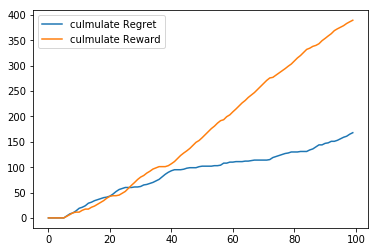

In [277]:
plt.plot(np.cumsum(C3.regret_history))
plt.plot(np.cumsum(C3.reward_sum_each_step))
plt.legend(["culmulate Regret", "culmulate Reward"])

In [278]:
C4 = copy.deepcopy(C)
thompson_agent = ThompsonAgent(C4.n_client, C4.n_commodity, recommendation_length=reco_length)
run(C4, thompson_agent, 100)

round 0
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [183 181  93  40 184]
recommandation_list [183 181  93  40 184]
regret 0 	regret-moreinfo 0
round 1
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [176 146 109  95 163]
recommandation_list [176 146 109  95 163]
regret 0 	regret-moreinfo 0
round 2
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [ 62  18  92  87 106]
recommandation_list [ 62  18  92  87 106]
regret 0 	regret-moreinfo 0
round 3
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [155  35 165  13  11]
recommandation_list [155  35 165  13  11]
regret 0 	regret-moreinfo 0
round 4
client_waiting_list []
command_list []
client_waiting_list []
ca

client_waiting_list [ 20  21  23  24  25  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57  58  60
  61  62  63  64  67  68  69  71  72  73  74  76  77  78  79  80  81  82
  84  85  86  87  89  90  91  92  93  95  96  97  98  99 142 143 144 145
 146 147 148 150 151 152 153 154 155 156 157 158 159 160 161 163 164 165
 166 167 168 169 170 172 173 175 176 177 178]
click_list [ 97 168 151]
recommandation_list [ 97  10 168 151 198]
recommandation_list [ 97  10 168 151 198]
regret 2 	regret-moreinfo 1.4000000000000004
round 18
client_waiting_list [ 20  21  22  23  24  25  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57  58
  60  61  62  63  64  67  68  69  70  71  72  73  74  76  77  78  79  80
  81  82  84  85  86  87  89  90  91  92  93  95  96  98  99 142 143 144
 145 146 147 148 150 152 153 154 155 156 157 158 159 160 161 163 164 165
 166 167 169 170 172 

client_waiting_list [  0   1   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19
  20  21  23  24  27  28  29  30  31  32  33  34  35  36  37  38  39  42
  43  44  45  46  48  50  51  52  53  55  56  57  58  59  60  62  63  64
  65  66  67  68  71  72  74  75  76  77  83  85  88  89  90  92  94  97
  98 109 114 115 119 141 142 149 151 152 162 164 167 168 171 174 175 179]
command_list [77 55]
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  73   0   0   0   0  80   0  84   0  86  87   0
   0   0   0  93   0   0   0 101 102 103 104 108   0 110 111 112   0   0
 116 118   0 121 123 124 127 131 132 135 140   0   0   0   0   0   0   0
   0   0   0   0   0   0]
cart_list []
client_waiting_list [  0   1   2   4   5   6   7   8  10  11  12  13  14  15  16  17  18  19
  2

client_waiting_list [  0   1   2   4   5   6   8  10  11  12  13  15  16  17  18  19  20  21
  23  24  25  26  28  30  31  32  33  34  35  36  37  38  39  41  42  43
  44  48  50  51  52  53  57  58  60  61  62  63  64  65  67  68  69  71
  73  75  76  78  79  80  81  82  84  85  86  87  89  90  91  92  93  94
  95  96  97  98  99 101 102 104 109 114 115 116 118 119 121 124 127 131
 132 140 141 142 144 149 151 152 156 162 168 170 171 174 179]
command_list [121  73]
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  22   0   0   0   0  27   0   0   0   0   0   0   0   0   0   0   0  40
   0   0   0   0  47   0  49   0   0   0   0  54  55   0   0   0   0   0
   0   0   0   0   0   0  70   0   0   0   0  77   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 100   0   0 103
   0 106 107 108   0 110 111 112   0   0   0 117   0   0   0 123   0 125
   0   0   0 135 138 139   0   0   0 143   0 148   0 150   0   0 153   0

client_waiting_list [  1   2   4   8   9  10  11  12  13  15  16  17  18  19  20  21  22  23
  24  25  27  28  30  31  32  33  34  35  37  38  39  40  42  43  44  46
  47  48  49  54  55  56  59  60  61  62  63  66  68  70  71  72  73  74
  76  78  79  80  81  82  83  84  86  87  88  93  94  95  96  99 101 102
 103 104 106 107 108 109 110 111 113 114 116 117 118 119 123 125 126 127
 130 131 132 134 135 138 139 140 142 143 145 146 147 148 150 153 155 156
 158 159 160 163 164 165 166 167 168 169 170 175 176 177 178 183 184 187
 190]
command_list [150 155]
client_waiting_list [  0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  45   0   0   0   0  51   0   0   0   0   0   0   0   0  65   0  67   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 105   0   0   0   0   0   0   0   0   0   0
   0   0 120   0   0   0   0 129   0   0   0 133   0   

client_waiting_list [  2   3   4   8   9  10  12  13  14  15  16  18  22  24  25  27  29  38
  40  41  47  48  49  52  53  54  55  57  58  59  61  64  65  67  69  70
  72  73  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98 101 103 105 106 107 108 109 110 111 113
 114 117 118 120 122 123 125 126 127 129 133 135 136 137 138 139 140 142
 144 149 150 151 154 155 157 161 164 166 167 168 171 172 173 174 179 181
 183 184 186 188 191 192 196 197]
command_list [72]
client_waiting_list [  0   0   0   5   6   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  31   0   0   0  45   0   0   0   0   0   0   0  56   0   0   0   0
   0   0  66   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 128   0   0
   0   0   0   0   0   0   0 143   0   0   0   0   0   0 156   0 160   0
   0   0   0   0 170   0   0   0

client_waiting_list [  1   5   6  14  15  18  19  20  21  23  25  28  29  30  31  33  34  35
  39  41  42  43  44  45  46  48  49  50  51  53  56  57  60  62  63  64
  65  66  68  69  71  72  75  77  82  88  89  94  95  96  99 103 105 106
 107 108 109 110 111 113 114 115 117 120 121 122 123 124 125 126 127 128
 129 136 137 138 139 140 141 142 143 145 146 147 148 150 152 155 156 158
 160 162 163 164 165 166 168 169 170 173 175 176 177 178 180 181 183 184
 185 186 188 191 192 193 196 197]
command_list [162 160  88  51]
client_waiting_list [  0   0   0  11   0   0  17   0   0   0   0  22   0   0   0   0   0   0
   0   0   0  37   0  40   0   0   0   0   0   0  47   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  70   0   0   0   0  78   0  85
   0   0  90  92   0   0   0  97  98   0   0   0   0   0   0   0   0   0
 112   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 153   0   0   0   0   0   0
   0   0   0   0   

client_waiting_list [  1   2   3   5   6   7   8  10  12  13  14  16  17  19  20  21  22  23
  24  26  28  30  31  32  33  34  35  36  39  40  42  43  44  45  46  47
  52  53  54  55  56  58  59  60  62  64  65  66  67  68  69  71  72  74
  79  80  81  82  84  85  86  87  88  90  91  92  93  95  97  98 100 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 119 120 121
 122 123 124 125 126 127 128 129 131 132 136 137 138 139 146 147 149 150
 151 152 153 154 155 157 160 161 164 167 170 171 173 174 175 177 179 180
 181 183 184 185 186 191 192 194 195 196 197 199]
command_list [ 42 114]
client_waiting_list [  0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  29   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  48  49   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  70   0   0   0  75   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   

In [279]:
C5 = copy.deepcopy(C)
adapted_thompson_agent = AdaptedThompsonAgent(C5.n_client, C5.n_commodity, recommendation_length=reco_length)
run(C5, adapted_thompson_agent, 100)

round 0
recently_purchased_commodities set()
recommend_order [ 95   4  27 121 194  19 136  78  56  40 120 100 116  68 105 114  71 178
  64  98 186  94  28  20  66  21 173 138 112 190  54 193 107  82 189 147
  97 172 188  83  67  49  59   6  24 196  32  44  80 153 117  72 169  15
 199  70  58 125  42  76 192 119  92  57  87  41  37 103 146 198 122 127
 161 159   5  36  77 154  52  29  45  93 162  22  89  74 180 131 145   3
 128  35 109  51   7  23  12 185  65  53 140  47 164  25  81 177  14  18
 135 152 158  46 143  10 106   8  26  55  34 181 123 187  88 139 166 126
 150  61  33 163  99 137 124 142 141 156 184   1 183 176 110  96 167 174
 111 175 134 149 197 179  38  73  16  84 191 195 101  11  48   2  60 115
 130 132 129   9  31 113  39  63  86 168 144 160  69 108  75 118 102 104
 133  85  13 151 171  43 155 170  50 182 148  17   0  90 165  62  79 157
  91  30]
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation

regret 3 	regret-moreinfo 1.2000000000000002
round 19
recently_purchased_commodities {67, 70, 75, 145, 148, 30}
recommend_order [ 23  53  75 142  10  38 114 182 129 107 177  57 176  78 162 147  31  59
 110  79 175  91  45 113  49 105 146  82  30 150 126  65  67   6 172  98
 187  19 140 145  39 190  55  14 135  61  47 106  13  72  21  34 185  42
 141 160  44  77  64   8  24  46 128  63 124  26 155  54  62 102  83  36
 144 148 103 171 158 165 132 136  60  48  99 131  11  73 163  96 167  17
 134 154  80 118  84  76 119 108  70  97   3 184 152  88  94 193 111  58
  37 179 133  51  74  18 168 188 157  16   5 156  20 117 159 120  81 178
 112  87  93  56 189  12 191  69 169   7 183  22 125  27 199 149  85  29
 101  40 164  50 123   1 181   9  33  15 170 104 137 143 138 195 198  66
 194  32 139 161 127  35 197 153  68  86 130  90 109   4  95 166 100   2
  25 122  71 115 192 186  52 116  92  41  28  43 174  89 121 180   0 173
 151 196]
client_waiting_list [ 20  21  22  23  24  25  26  27  28  2

recently_purchased_commodities {34, 74, 13, 175, 145, 51, 62}
recommend_order [ 34 103  23 197  25 162 178  60  97  30  51 145   9  48  61 130  78 141
  18 104  63  40   3 150  62   0  42  82 158  94 106  38  49 192 177  67
 127  77  58 193 167 170 160  13  57 124  36  75 171   8 135 113 142  39
  44 117 133  86 182 175  45  83 161  31  22  89  70  11  76   5 152  69
   6 181  55 108 129 111 146 198 173  65 194 107 188 186  85  29   7 137
 159 166  53  47 176 118 199 148  71  79  46 156  10  52 153  87  81 180
 125 110  56 196 120 165 138  35 114 136 119 195 155 147  91 105 157 190
 168  84  14 101 140  26  74  88  12  37  27 134  93 121 149 169 115  24
  17  16 143 132 184 116  64 109  32  59 172 126  96  50 144 102   2 179
 164  80  99 100 185  95  66 183 122  43  20  54 139 128  73  28  19  68
 187 151   1   4 191  41  21 123  98  33 163  72 154 131  92 189 174  15
 112  90]
client_waiting_list [  1   2   4   5   6   7   8  11  12  14  15  16  17  18  19  20  21  22
  23  24  25  26

recently_purchased_commodities {16, 178, 74, 0}
recommend_order [  0  89 178 190   3 187   6  10 146  78  23  30  40  44  39  27  25 167
  21 181  87 145  45 155  16   8 138 104 192  32  62  92 170  48  63 142
 188 175 149 118  61  19 125  64 124  53  74 153 158 108 171  88  65 161
  33  34  84  75  46  70  58  73  57 106 168  31 182  38 141  24  20  99
  47 103  28  67  42 109 147  36  51 113  18  83 164  35 196 137 128  69
   9  77  79  82 134 135  37  12 151  86  94 117  17 115 136 165  90  81
 157 112 162  91  13 180 163  66 114 150 130  56  50  59  72 131  60 186
 127 102 122   5  29 119 174  71  93   1 152 129 144  85 177 116 184 120
  11 148  52  96 133 176 172 195 173 139 160 121 198 183 101   2  95  76
  14 143 199 179 105 126   7 111  15 110 189 166  26  55  43   4 154 159
 156  22 193  49 100  41 185 194 169  80  97 140 107 123 197  54 132  98
  68 191]
client_waiting_list [  1   2   4   5   7   8   9  10  12  14  15  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  

client_waiting_list [  0   0   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  44   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  74   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 114   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 141
   0   0   0   0   0   0   0   0 156 158   0 161   0   0 167 172   0 176
   0   0 180   0   0   0 185   0   0 189   0   0   0 194   0   0 199]
cart_list [  0 176]
client_waiting_list [  1   2   3   4   7   9  10  11  13  15  18  20  23  24  26  28  30  31
  35  37  38  39  46  47  49  50  51  56  57  59  60  61  67  69  70  71
  72  73  75  76  78  80  82  84  85  87  88  90  91  92  93  95  96  97
  98  99 100 101 105 107 108 110 111 112 113 116 118 119 120 121 122 123
 125 126 127 128 129 130 132 133 134 135 136 138 139 142 143 144 146 147
 148 150 153 160 165 166 175 177 179 181 183 184 186 188 191 192 19

recently_purchased_commodities {96, 65, 68, 135, 176, 23, 86, 87, 156, 157}
recommend_order [ 68 146 187 129 178  52  32  39  18  98 135   0 156   7  74  28  11  64
  21 159 176 119  65  46  62 167  70 140  23 122 175  87 170  72  66 104
  59  86  49  41 103 134 145 125  67  15  71 147 150  55  25 144  36  37
 113  82 157  63  51 137 182  79  96  95  83  42  16 165  81  73 153  85
   3  35 169 115 105 131  91  60  53  44 160   8 162  17  54 186 181  89
  50  13  88 124  34  45 141  43  20 177  69  10 110 143  31  48  57 195
 152  84 123 197 168 190 106  90  78 139  38 107  58 117 194 101 127 188
 191 193  30 138 161  77  19  92 128   1 155   6 148 163 166  14   2 142
  61  76 109 196  29 189 102 158 198 179  56  26 149  24 112  33 192  80
  75   9  47   5 111 154  94 121 151 180 100 130  40 120 133 126 136 199
  93 118 174 172  97 114  99 171 164 184 116  12 108 173   4  22 183 185
 132  27]
client_waiting_list [  6   9  10  11  13  14  16  17  19  21  22  24  25  26  27  29  32  33
  

In [280]:
C6 = copy.deepcopy(C)
adapted_random_agent = AdaptedRandomAgent(C6.n_client, C6.n_commodity, recommendation_length=reco_length)
run(C6, adapted_random_agent, 100)

round 0
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [145  22  60 199 123]
recommandation_list [145  22  60 199 123]
regret 0 	regret-moreinfo 0
round 1
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [ 57 138  35  15  98]
recommandation_list [ 57 138  35  15  98]
regret 0 	regret-moreinfo 0
round 2
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [ 10 166   9  14  43]
recommandation_list [ 10 166   9  14  43]
regret 0 	regret-moreinfo 0
round 3
client_waiting_list []
command_list []
client_waiting_list []
cart_list []
client_waiting_list []
click_list []
recommandation_list [ 54  65  11 140 160]
recommandation_list [ 54  65  11 140 160]
regret 0 	regret-moreinfo 0
round 4
client_waiting_list []
command_list []
client_waiting_list []
ca

client_waiting_list [ 20  21  23  26  27  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  46  47  50  51  52  53  54  55  57  58  59  60  61  62  63
  64  65  66  68  69  71  72  73  74  75  78  79  80  81  83  84  87  88
  90  91  92  93  94  96  98  99 140 141 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 171 172 173 174 175 176 177 178 179]
command_list [171 148]
client_waiting_list [ 0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 70  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
cart_list []
client_waiting_list [ 20  21  23  26  27  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  46  47  50  51  52  53  54  55  57  58  59  60  61  62  63
  64  65  66  68  69  71  72  73  74  7

recommandation_list [ 66  74  53 187 141]
recommandation_list [ 66  74  53 187 141]
regret 3 	regret-moreinfo 2.6
round 24
client_waiting_list [  2   8   9  10  11  12  13  14  16  17  19  22  24  25  34  42  45  48
  49  56  67  76  77  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  96  97  98  99 140 142 144 145 146 147 149 150 151 152 153 154
 155 156 158 159 160 161 162 164 165 166 167 168 169 170 172 173 175 177
 178]
command_list [161]
client_waiting_list [  0   1   0   3   4   5   6   7   0   0   0   0   0   0   0  15   0   0
  18   0   0   0   0  28   0   0   0   0   0   0   0  70   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115
 119   0   0   0   0   0   0 148   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 171   0   0   0 176   0   0]
cart_list [6]
client_waiting_list [  2   8   9  10  11  12  13  14  16  17  19  22  24  25  34  42  45  48
  49  56  67  76  77  80  81  82  83  84  85  86  8

command_list [47 50]
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  34   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  83  84
   0   0   0  90  92  93   0   0  98 101 102 103 104 108   0 110 114   0
 116 118   0 121 123 124 127 131 132 141   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
cart_list []
client_waiting_list [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  26  27  28  29  30  31  32  33  35  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  57  58  59  60
  61  62  63  64  66  67  68  70  72  73  74  76  78  79  82  85  86  89
  95  97 109 115 119 142 143 146 147 148 155 157 163 164 167 168 170 171
 174 175 176 177 179]
click_list [47 50]
recommandation_list [ 88 185  47 196  50

recommandation_list [ 89  91  65  33 146]
regret 1 	regret-moreinfo -0.5
round 51
client_waiting_list [  1   3   4   5   7   8  11  12  13  14  15  16  17  21  23  24  26  27
  28  29  30  31  32  33  35  36  37  38  39  40  42  43  44  45  47  48
  49  50  51  53  55  59  60  61  62  63  64  68  70  72  73  74  75  76
  77  78  79  80  81  82  84  85  86  87  88  93  94  96  97  99 101 102
 104 106 107 108 110 111 112 113 114 117 118 119 121 125 126 130 131 132
 134 135 138 139 141 144 147 150 151 152 153 154 157 159 160 161 162 163
 164 166 167 168 169 170 172 174 175 177 178 179 183 184 187 190]
command_list [111 169 147 102]
client_waiting_list [  0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  41   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  66   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 105   0   0   0   0   0   0   0   

regret 1 	regret-moreinfo 0.20000000000000018
round 60
client_waiting_list [  0   1   3   4   7   8   9  10  11  12  13  14  15  16  17  20  21  22
  23  24  25  27  28  30  31  32  33  34  35  37  39  40  41  42  43  44
  47  49  51  52  53  54  55  57  58  59  60  61  62  65  66  67  68  69
  71  72  73  74  75  76  79  84  86  89  90  91  92  93  94  95  97  98
 104 105 106 107 108 110 112 113 117 118 119 120 126 130 131 132 133 134
 135 137 138 139 140 142 143 145 148 149 150 151 154 155 156 158 159 160
 162 164 165 168 170 171 173 175 176 178 179 181 183 184 186 187 190 196
 197]
command_list [151 145  23  20]
client_waiting_list [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  19   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  77   0   0   0  87   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

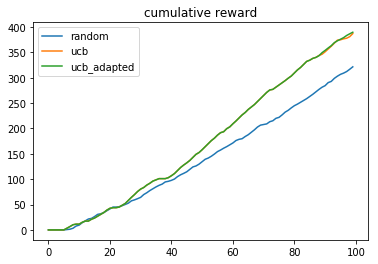

In [281]:
plt.plot(np.cumsum(C1.reward_sum_each_step), label='random')
plt.plot(np.cumsum(C2.reward_sum_each_step), label='ucb')
plt.plot(np.cumsum(C3.reward_sum_each_step), label='ucb_adapted')
plt.title('cumulative reward')
plt.legend()

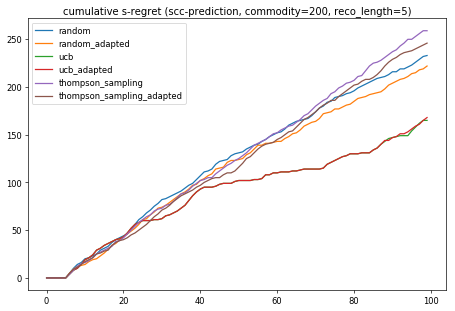

In [282]:
plt.figure(figsize=(9,6),dpi=60)

plt.plot(np.cumsum(C1.regret_history), label = 'random')
plt.plot(np.cumsum(C6.regret_history), label = 'random_adapted')
plt.plot(np.cumsum(C2.regret_history), label = 'ucb')
plt.plot(np.cumsum(C3.regret_history), label = 'ucb_adapted')
plt.plot(np.cumsum(C4.regret_history), label = 'thompson_sampling')
plt.plot(np.cumsum(C5.regret_history), label = 'thompson_sampling_adapted')

title = 'cumulative s-regret (scc-prediction, commodity=' + str(C.n_commodity) + ', reco_length='+str(reco_length)+')'
plt.title(title)
plt.legend()
plt.savefig('./figures/'+title+'.pdf', format='pdf')

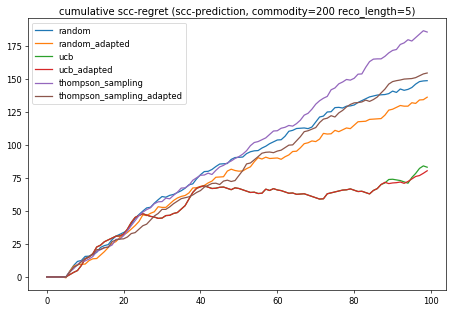

In [283]:
plt.figure(figsize=(9,6),dpi=60)
plt.plot(np.cumsum(C1.regret_moreinfo_history), label = 'random')
plt.plot(np.cumsum(C6.regret_moreinfo_history), label = 'random_adapted')
plt.plot(np.cumsum(C2.regret_moreinfo_history), label = 'ucb')
plt.plot(np.cumsum(C3.regret_moreinfo_history), label = 'ucb_adapted')
plt.plot(np.cumsum(C4.regret_moreinfo_history), label = 'thompson_sampling')
plt.plot(np.cumsum(C5.regret_moreinfo_history), label = 'thompson_sampling_adapted')

title='cumulative scc-regret (scc-prediction, commodity=' + str(C.n_commodity) + ' reco_length='+str(reco_length)+')'
plt.title(title)
plt.legend()
plt.savefig('./figures/'+title+'.pdf', format='pdf')

In [284]:
def run_with_revenue(env, agent, n):
    for i in range(n):
        print('round', i)
        active_clients = env.get_clients(1)
        
        for c in active_clients:
            env.update_desire(c, rate_rise=0.5)
            recomedation_list = agent.recommend(c)
            articles_buy = env.return_command(c, recomedation_list)
            
            revenue_list = env.get_revenue(c, recomedation_list, articles_buy)
            regret = env.get_regret(c, recomedation_list, revenue_list)
            print('regret', regret, '\treward', sum(revenue_list))
            env.do_purchase(c, articles_buy)
            env.update_history(revenue_list, regret, revenue_list)
            agent.update_state(c, recomedation_list, revenue_list, articles_buy)

In [285]:
CM1 = copy.deepcopy(C)
random_agent = RandomAgent(CM1.n_client, CM1.n_commodity, recommendation_length=5)
run_with_revenue(CM1, random_agent, 100)

round 0
client_waiting_list []
command_list []
recommandation_list [116  66 199 110  83]
regret 0 	reward 0
round 1
client_waiting_list []
command_list []
recommandation_list [100  87   1  59  29]
regret 0 	reward 0
round 2
client_waiting_list []
command_list []
recommandation_list [ 15 193 194  53 118]
regret 0 	reward 0
round 3
client_waiting_list []
command_list []
recommandation_list [127 138  20 145 108]
regret 0 	reward 0
round 4
client_waiting_list []
command_list []
recommandation_list [ 54 113  42  50  13]
regret 0 	reward 0
round 5
client_waiting_list []
command_list []
recommandation_list [  4 105 119  99  72]
regret 0 	reward 0
round 6
client_waiting_list [20 21 23 24 25 26 28 31 34 35 36 38 39 61 63 64 69 71 72 73 76]
command_list []
recommandation_list [ 95 182 190 165 113]
regret 5 	reward 0
round 7
client_waiting_list [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 7

round 57
client_waiting_list [  0   1   2   4   6   7   8   9  12  13  14  15  16  17  20  21  22  23
  24  26  28  29  31  32  33  34  35  38  39  41  42  43  44  46  47  49
  50  51  52  56  57  59  62  63  66  68  69  70  71  72  74  76  77  78
  79  84  85  88  90  91  92  95  97  98 102 103 104 105 106 107 108 110
 112 113 114 116 118 123 124 125 127 131 132 133 134 136 137 138 139 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 161 163 164 165 166 167 169 171 174 175 176 179 181 184 186 187 190 196]
command_list [164  33  28  32]
recommandation_list [164  33  28  73  32]
regret 1 	reward 4
round 58
client_waiting_list [  0   1   2   4   6   7   8   9  12  13  14  15  16  17  20  21  22  23
  24  26  29  31  34  38  39  41  42  43  44  45  46  47  49  50  51  52
  56  57  59  62  63  64  66  68  69  70  71  72  74  76  77  78  79  83
  84  85  87  88  90  92  93  95  97  98 102 103 104 105 106 107 108 110
 112 113 114 116 118 123 124 125 127 131 132 1

In [286]:
CM2 = copy.deepcopy(C)
ucb_agent = UCBAgent(CM2.n_client, CM2.n_commodity, recommendation_length=reco_length)
run_with_revenue(CM2, ucb_agent, 100)

round 0
client_waiting_list []
command_list []
recommandation_list [199  62  72  71  70]
regret 0 	reward 0
round 1
client_waiting_list []
command_list []
recommandation_list [99 76 74 73 69]
regret 0 	reward 0
round 2
client_waiting_list []
command_list []
recommandation_list [ 0  7 78 77  1]
regret 0 	reward 0
round 3
client_waiting_list []
command_list []
recommandation_list [105   8  81  80  79]
regret 0 	reward 0
round 4
client_waiting_list []
command_list []
recommandation_list [107  84  82   2   3]
regret 0 	reward 0
round 5
client_waiting_list []
command_list []
recommandation_list [109 111  85  83   4]
regret 0 	reward 0
round 6
client_waiting_list [20 21 23 24 25 26 28 31 34 35 36 38 39 61 63 64 69 71 72 73 76]
command_list [23]
recommandation_list [23 27 91 90 89]
regret 4 	reward 1
round 7
client_waiting_list [20 21 22 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75

/home/dongwenjian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/dongwenjian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  23  26  27  31  34  36  39  40  43  44  47  49  51  52  56  57  58
  59  60  62  63  64  65  66  67  68  70  71  72  73  74  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  95  97  99 101 102 103 104
 108 109 110 112 114 115 116 118 119 121 123 124 127 131 132 141 143 144
 145 146 148 149 150 151 153 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 176 179]
command_list [141 145  34]
recommandation_list [141 145  34  30  29]
regret 2 	reward 3
round 42
client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  23  25  26  27  28  29  31  36  37  38  39  40  43  44  45
  47  48  49  51  52  57  58  62  65  66  67  68  70  74  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  95  99 101 102 103 104 108
 109 110 111 112 114 115 116 118 119 121 123 124 127 131 132 135 142 143
 144 146 148 149 150 151 153 154 155 156 

client_waiting_list [  5   6  11  15  18  19  23  24  25  26  27  28  31  34  36  37  38  39
  40  42  43  44  45  46  47  48  52  54  56  57  58  59  60  62  63  65
  67  68  70  74  77  78  79  83  85  90  91  93  94  98 104 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 145 147 148 151 152
 153 154 155 156 160 161 162 163 165 166 170 176 178 179 180 181 183 184
 185 186 187 188 189 190 191 192 193 194 196 197 199]
command_list [115  15]
recommandation_list [  0 115  16  15  14]
regret 3 	reward 2
round 85
client_waiting_list [  5   6  11  17  18  19  22  23  24  25  26  27  28  31  34  35  36  37
  38  39  40  42  43  44  45  46  47  48  52  53  54  56  57  58  59  60
  62  63  65  66  67  68  70  74  75  77  78  79  83  85  90  91  93  94
  98 104 106 107 108 109 110 111 112 113 114 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 145
 147 148 1

In [287]:
CM3 = copy.deepcopy(C)
ucb_adapted_agent = UCBAgent_Adapted(CM3.n_client, CM3.n_commodity, recommendation_length=reco_length)
run_with_revenue(CM3, ucb_adapted_agent, 100)

round 0
client_waiting_list []
command_list []
recommandation_list [199, 62, 72, 71, 70]
regret 0 	reward 0
round 1
client_waiting_list []
command_list []
recommandation_list [99, 76, 74, 73, 69]
regret 0 	reward 0
round 2
client_waiting_list []
command_list []
recommandation_list [0, 7, 78, 77, 1]
regret 0 	reward 0
round 3
client_waiting_list []
command_list []
recommandation_list [105, 8, 81, 80, 79]
regret 0 	reward 0
round 4
client_waiting_list []
command_list []
recommandation_list [107, 84, 82, 2, 3]
regret 0 	reward 0
round 5
client_waiting_list []
command_list []
recommandation_list [109, 111, 85, 83, 4]
regret 0 	reward 0
round 6
client_waiting_list [20 21 23 24 25 26 28 31 34 35 36 38 39 61 63 64 69 71 72 73 76]
command_list [23]
recommandation_list [23, 27, 91, 90, 89]
regret 4 	reward 1
round 7
client_waiting_list [20 21 22 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73

client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  21  22  23  24  27  30  32  33  35  41  43  44  46  47  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  69  70  71  72  73
  74  75  76  77  78  79  80  81  83  84  85  86  87  89  90  93  94  96
  97  98 101 104 109 114 115 116 119 121 124 132 140 141 143 144 145 146
 151 159]
command_list [33 35]
recommandation_list [180, 188, 33, 35, 181]
regret 3 	reward 2
round 37
client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  21  22  23  27  32  39  41  43  44  47  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  94  95  96  97  98
  99 101 104 109 114 115 116 118 119 121 124 127 132 140 141 143 144 145
 146 148 149 150 151 155 159 166]
command_list []
recommandation_list [182, 191, 184, 185, 187]
regret 5 	reward 0
round 38
cli

/home/dongwenjian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/dongwenjian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


 4
round 46
client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  28  29  30  31  33  35  38  41  42  45
  46  47  48  49  50  51  57  58  69  75  76  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  99 101 102 103 104 106 107 108
 109 110 111 112 114 115 116 117 118 119 121 123 124 127 131 132 135 138
 139 146 147 148 149 150 151 152 153 154 156 160 164 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 190]
command_list [ 42 171 169 168]
recommandation_list [60, 42, 171, 169, 168]
regret 1 	reward 4
round 47
client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  28  29  30  31  32  33  35  38  41  45
  46  47  48  49  50  51  53  54  55  57  61  69  75  76  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  98  99 100 101 102
 103 104 106 107 108 109 110 111 112 114 115 116 117 118 119 121 123 124


client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  23  27  32  37  38  39  40  41  42  43  44  45  47  48  49
  50  51  52  57  59  60  61  62  63  64  65  67  68  70  71  72  73  74
  75  77  78  79  83  84  85  89  90  96 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 123 124 125 126
 127 129 130 131 132 133 134 135 136 137 138 139 145 149 151 152 153 154
 156 166 169 171 173 174 175 176 177 178 181 183 184 186 187 190 196 197]
command_list [ 63  42 151 174 173]
recommandation_list [63, 42, 151, 174, 173]
regret 0 	reward 5
round 62
client_waiting_list [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  23  27  31  37  38  39  40  43  44  45  47  48  49  50  51
  52  53  55  56  57  58  59  60  62  64  65  66  67  68  70  71  72  73
  74  75  77  78  79  80  81  83  84  85  86  87  89  90  94  96 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 

client_waiting_list [  0   1   3   4   5   6   7  15  18  19  20  21  23  25  27  28  29  30
  32  33  35  37  38  39  40  41  43  44  45  46  48  50  52  53  55  56
  59  60  61  62  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  84  86  87  88  89  91  92  93  94  95  96  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 144 145 147 148 149 150 152 153 154 155 156
 157 158 164 165 166 167 169 170 171 176 177 178 179 180 181 183 184 185
 186 187 188 189 190 191 192 193 196 197]
command_list [ 96  46  45 165]
recommandation_list [96, 97, 46, 45, 165]
regret 1 	reward 4
round 78
client_waiting_list [  0   1   3   4   5   6  15  18  19  20  21  23  25  27  29  30  32  33
  35  37  38  39  40  41  42  43  44  48  50  52  53  55  56  59  60  61
  62  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  86  

In [288]:
CM4 = copy.deepcopy(C)
thompson_agent = ThompsonAgent(CM4.n_client, CM4.n_commodity, recommendation_length=reco_length)
run_with_revenue(CM4, thompson_agent, 100)

round 0
client_waiting_list []
command_list []
recommandation_list [166 157  69 119  74]
regret 0 	reward 0
round 1
client_waiting_list []
command_list []
recommandation_list [163 195  28 152  31]
regret 0 	reward 0
round 2
client_waiting_list []
command_list []
recommandation_list [170  81 169 184 180]
regret 0 	reward 0
round 3
client_waiting_list []
command_list []
recommandation_list [179 103 175  96  91]
regret 0 	reward 0
round 4
client_waiting_list []
command_list []
recommandation_list [ 36   7 105 155 159]
regret 0 	reward 0
round 5
client_waiting_list []
command_list []
recommandation_list [194 100  19 188 198]
regret 0 	reward 0
round 6
client_waiting_list [20 21 23 24 25 26 28 31 34 35 36 38 39 61 63 64 69 71 72 73 76]
command_list [39]
recommandation_list [  9  39 165 136 162]
regret 4 	reward 1
round 7
client_waiting_list [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70

regret 3 	reward 2
round 26
client_waiting_list [  0   1   2   3   4   7   8   9  10  11  12  13  14  19  21  24  26  29
  36  38  39  44  45  46  47  50  52  57  59  60  64  69  70  76  78  80
  81  82  87  88  89  90  91  95  96  97  99 140 142 143 144 145 148 149
 150 151 152 153 154 155 157 158 159 160 161 162 163 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179]
command_list [160 161  64]
recommandation_list [160 131 161  64  37]
regret 2 	reward 3
round 27
client_waiting_list [  0   1   2   3   4   7   8   9  10  11  12  13  14  19  20  21  23  24
  25  26  28  29  31  34  36  38  39  43  44  45  46  47  50  52  57  59
  60  61  63  69  70  71  72  73  76  78  80  82  88  89  90  91  95  97
  99 140 142 143 144 145 148 149 150 151 152 153 154 155 157 158 159 162
 163 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
command_list [12 20]
recommandation_list [185  12  16  20  27]
regret 3 	reward 2
round 28
client_waiting_list [  0   1   2   3   4   5   7   8

client_waiting_list [  1   2   3   4   5   7   8   9  11  13  14  16  17  19  21  23  24  25
  26  28  29  31  35  36  38  41  43  44  45  47  50  52  55  56  57  60
  61  63  64  68  69  70  72  73  76  77  79  80  81  82  84  87  88  89
  90  91  92  94  96  97  99 100 102 103 106 107 108 109 110 111 114 116
 117 119 121 123 124 125 126 127 131 132 134 135 138 139 141 142 143 145
 146 147 148 149 151 152 154 155 157 158 159 160 161 162 163 164 165 166
 168 169 170 172 175 176 177 178 179 183 184 187 190]
command_list [106 134]
recommandation_list [106 104  42  48 134]
regret 3 	reward 2
round 51
client_waiting_list [  1   2   3   4   5   7   8   9  11  12  13  14  16  17  19  21  23  24
  25  26  27  28  29  30  31  32  33  35  36  37  38  40  41  43  44  45
  46  47  50  52  55  56  57  60  61  62  63  64  65  68  69  70  72  73
  74  75  76  77  79  80  81  82  83  84  87  88  89  90  91  92  93  94
  96  97  99 100 102 103 107 108 109 110 111 113 114 116 117 119 121 123
 124 125 1

client_waiting_list [  0   3   4   5   7  10  12  15  16  21  22  23  24  25  26  28  29  31
  35  38  41  42  43  44  45  46  47  50  52  53  54  55  56  57  58  59
  60  61  63  64  67  68  69  70  71  72  73  76  79  81  84  85  86  87
  88  90  91  94  95  97  98  99 100 101 102 103 105 107 108 110 111 113
 116 119 120 121 123 124 125 128 129 130 131 132 133 135 136 138 139 141
 144 145 146 147 148 150 160 161 164 166 171 173 174 178 179 181 184 186
 187 188 190 191 193 197]
command_list [ 58 161 136]
recommandation_list [ 58 161  27  82 136]
regret 2 	reward 3
round 72
client_waiting_list [  0   3   4   5   7  10  12  15  16  21  22  23  24  25  26  28  29  31
  35  38  41  43  44  45  46  47  50  52  55  56  57  59  60  61  63  64
  67  68  69  70  71  72  73  76  77  79  81  84  86  87  88  90  91  92
  94  95  97  98  99 100 101 102 103 105 107 108 110 111 113 116 119 120
 121 123 124 125 128 129 130 131 132 133 135 138 139 141 143 144 145 146
 147 148 153 158 160 164 166 171 1

client_waiting_list [  1   2   6   9  10  11  12  13  14  15  17  19  21  23  25  26  28  29
  31  32  34  35  41  42  44  46  47  49  50  51  52  53  54  55  57  59
  60  63  64  66  67  68  69  71  72  73  76  77  79  80  81  82  83  84
  85  86  87  89  93  95  96  98  99 100 102 103 104 105 108 110 111 112
 113 115 116 118 119 120 121 123 124 125 128 130 131 132 135 139 140 141
 143 144 146 147 151 152 153 155 156 157 158 159 162 163 164 165 167 168
 169 170 171 173 174 175 176 177 180 181 184 185 186 187 188 189 190 191
 194 199]
command_list [99 77 80 19]
recommandation_list [ 99 178  77  80  19]
regret 1 	reward 4
round 92
client_waiting_list [  1   2   6   9  10  11  12  13  14  15  17  21  23  25  26  28  29  31
  32  35  41  42  44  46  47  49  50  52  53  54  55  56  57  59  60  61
  63  64  66  67  68  69  70  71  72  73  76  79  81  82  83  84  85  86
  87  89  90  93  95  96  98 100 102 103 104 105 108 110 111 112 113 115
 116 118 119 120 121 123 124 125 128 130 131 132 1

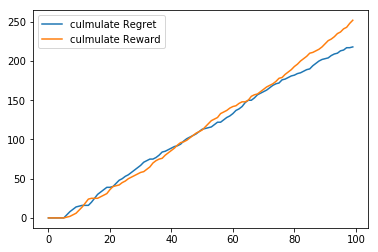

In [289]:
plt.plot(np.cumsum(CM4.regret_history))
plt.plot(np.cumsum(CM4.reward_sum_each_step))
plt.legend(["culmulate Regret", "culmulate Reward"])

In [290]:
CM5 = copy.deepcopy(C)
adapted_thompson_agent = AdaptedThompsonAgent(CM5.n_client, CM5.n_commodity, recommendation_length=reco_length)
run_with_revenue(CM5, adapted_thompson_agent, 100)

round 0
recently_purchased_commodities set()
recommend_order [  4  33 131  15 187   1 159 114 171  27 160  17  56 141  28 199  77 155
  58  66 143  37 186 135  93 194  72 193 170  55  12 100 168 104  70 123
 165  57 180 126 117  47 176  68  22  89 102 103  30 107  62 145  79  14
  60  61  97 146   3 172   2 195 101 158 164  71  18 119  31 174 113  92
 177 110  52  80 129  75  88 118  11 125 178 105  69  45  67  49 150 106
 175 111  54 197  16  10 136  34  23 192  83  59  84 147  38 151 109  81
 189 124 128 184 190 121 188   5 132 142  74  73 138  20 179   7 173 116
 112  87 127 139 122  41  96 133  86  98  39 161 156   0  26 149  21 144
  99 162 182 148  65 137  63  53 134  76 154 185   8 130  44 120  29  95
  13  90  24 196 152  43 183 153 198  36 166  85 157  78  19 108 169  91
 163  82  50 115 167  48  42  35  94 191   6  25  40 140  51  46  32  64
 181   9]
client_waiting_list []
command_list []
recommandation_list [4, 33, 131, 15, 187]
regret 0 	reward 0
round 1
recently_purchased

regret 2 	reward 3
round 29
recently_purchased_commodities {160, 161, 36, 16, 176, 150, 24}
recommend_order [ 73  35 129 150 170  44 177 182  48 178 152  11  43 154  29 161 124 181
  77  45  93 172 139  36  46  17   6  39 138 160 158 180 107  57  83 149
  13  41  24  54 147 169  52  80 122  67  59 193  79  89  61 126  42  28
  20  91   2  64  94  21  14  26   7 123  82  74 186 104 197  27 199  37
  62 185 191 174  25 159  55  78  31 162 141   3  65   5  16 111 145 153
  53 108  40   4 114 151  47 140 173  12 168 135   1  30  19 102   8 156
 128 113  63   0  18  66 148 109 146 137 125  97 118  84 121 142  85 134
 115 190 176 117  60  49 192 188 184 127 130 155  22 175 167  96 165  75
  95  68  92 163 183 164  88  34 110 105 119 166 179  69 131  23 101  50
  90 112 194 116  76 198 132  10 189  72 103  58  98  87 144 136  86  81
 133  71   9 171  70 143  51 187  33 106 100  32  56  38 196 157 120 195
  99  15]
client_waiting_list [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  1

recently_purchased_commodities {70, 6, 107, 44, 12, 84, 87, 151, 29, 94}
recommend_order [151  70  98 163 168  73 120 150  29  31 160  28  67 121  65  90 193  46
  74  12 176 145 104  94 149 144  87  63  84 143   3 182  75  48  79  45
 157  44 179 139  76 146 172  77  17 117  62  40 135  36  20   6  78   4
  47 161 148  49 170 154   9  34  41 122  72  37 126  42  30 177  43  25
 131   8  19  35  24   1  64 103 159  83  68  53  54 153  56  21  89 140
  26 183 142 125 113 155 173  88  15   5 115 164 128 112 107  81  58  39
 187  66  71 124  14  97 110  86  13 191  92  33  61   0 130 199 102  99
  55 116 189  57 158 109   7  93 138 156  16 147  52 190 137  60  69  11
 195 171 119 108  80 181  50 123 174  22 129 165 196 175  82  27  32 184
 133 169  59  10 106 186 118 180  85 132 198 185 192 136 178 162 166 141
 114 111 167   2 100  38 197  51  91  96  95  18 194 105 188  23 101 152
 134 127]
client_waiting_list [  0   1   2   3   4   7   8   9  10  11  14  15  16  18  20  21  22  23
  25 

recently_purchased_commodities {193, 163, 4, 196, 74, 178, 50, 146, 93}
recommend_order [ 65 176  63  54   7 149 183 192 121 108  48  35 158 180  74  87 126 184
 147 132  61  27 150  20  39  71  28 105 163  76  46  45 196  70  14 189
  67  16  73  79 112 140  49 159 141  81 151 107   4  57  83  26  29  56
  72 174 156  50 144 138  34  25  41 118 119 173   1 154  84  13 111  12
  94 161 199 182  22 171 131  78  85 113 193 123 146  10  33 114  99 122
 145 181 103 127   5  96 165 102  19  37  68  36  44 153 139 167  43   6
   3  77  15 133  42  95  58 168  32 143 142  53  93 188 187 177  52  17
 198 100 137 104  90  18  64  40  69 155 175 130 162  59 169 186  24  92
  88  31 128   8 125 135  66   0  75  30  80 170 120 194 110 160 134 157
  82 117  98   2   9  62 178 136  51 109  91  38 115 101 185 164 106 129
  11  86  89 116 124  21  55  47 195  23 152 191  60 148 190 197 172 166
 179  97]
client_waiting_list [  5  12  13  15  16  17  18  19  21  22  23  24  26  27  28  29  30  31
  33  

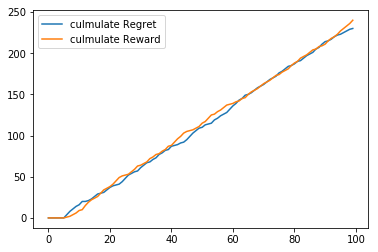

In [291]:
plt.plot(np.cumsum(CM5.regret_history))
plt.plot(np.cumsum(CM5.reward_sum_each_step))
plt.legend(["culmulate Regret", "culmulate Reward"])

In [292]:
CM6 = copy.deepcopy(C)
adapted_random_agent = AdaptedRandomAgent(CM6.n_client, CM6.n_commodity, recommendation_length=reco_length)
run_with_revenue(CM6, adapted_random_agent, 100)

round 0
client_waiting_list []
command_list []
recommandation_list [181 126  68 199  28]
regret 0 	reward 0
round 1
client_waiting_list []
command_list []
recommandation_list [ 47 179 197 166 195]
regret 0 	reward 0
round 2
client_waiting_list []
command_list []
recommandation_list [132 115 121 107  73]
regret 0 	reward 0
round 3
client_waiting_list []
command_list []
recommandation_list [ 63 123  90 188 141]
regret 0 	reward 0
round 4
client_waiting_list []
command_list []
recommandation_list [ 74  26 194 138 178]
regret 0 	reward 0
round 5
client_waiting_list []
command_list []
recommandation_list [117  97 194   5 109]
regret 0 	reward 0
round 6
client_waiting_list [20 21 23 24 25 26 28 31 34 35 36 38 39 61 63 64 69 71 72 73 76]
command_list [63]
recommandation_list [ 63  67 116 147 148]
regret 4 	reward 1
round 7
client_waiting_list [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68
 69 70

client_waiting_list [  2   4   6   7   8   9  16  20  21  22  23  25  29  31  33  34  35  37
  39  40  41  42  43  45  47  50  51  53  55  58  59  60  61  64  69  70
  71  72  73  75  78  81  82  84  86  87  88  89  90  91  92  93  97  98
 100 101 103 104 105 107 108 110 113 114 116 118 119 120 122 123 125 128
 129 130 132 133 134 135 136 137 138 140 144 147 149 151 152 153 154 156
 159 160 162 165 166 167 176 178 179 187 188 190 192 193 196]
command_list [ 58 132  16 133]
recommandation_list [ 58 132  16   0 133]
regret 1 	reward 4
round 71
client_waiting_list [  2   4   6   7   8   9  20  21  22  23  25  29  31  32  33  34  35  37
  39  40  41  42  43  45  46  47  48  50  51  53  55  60  61  64  69  70
  71  72  73  75  78  79  81  82  84  86  87  88  89  90  91  92  93  94
  97  98 100 101 103 104 105 107 108 110 113 114 116 118 119 120 122 123
 125 128 129 130 134 135 136 137 138 140 144 147 149 151 152 153 154 156
 159 160 162 165 166 167 176 178 179 187 188 190 192 193 196]
comma

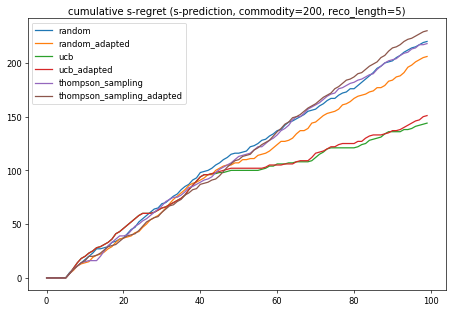

In [293]:
plt.figure(figsize=(9,6),dpi=60)

plt.plot(np.cumsum(CM1.regret_history), label = 'random')
plt.plot(np.cumsum(CM6.regret_history), label = 'random_adapted')
plt.plot(np.cumsum(CM2.regret_history), label = 'ucb')
plt.plot(np.cumsum(CM3.regret_history), label = 'ucb_adapted')
plt.plot(np.cumsum(CM4.regret_history), label = 'thompson_sampling')
plt.plot(np.cumsum(CM5.regret_history), label = 'thompson_sampling_adapted')

title = 'cumulative s-regret (s-prediction, commodity=' + str(C.n_commodity) + ', reco_length='+str(reco_length)+')'
plt.title(title)
plt.legend()
plt.savefig('./figures/'+title+'.pdf', format='pdf')

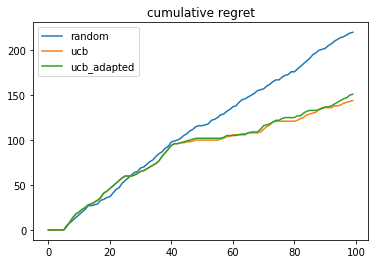

In [294]:
plt.plot(np.cumsum(CM1.regret_history), label = 'random')
plt.plot(np.cumsum(CM2.regret_history), label = 'ucb')
plt.plot(np.cumsum(CM3.regret_history), label = 'ucb_adapted')
plt.title('cumulative regret')
plt.legend()

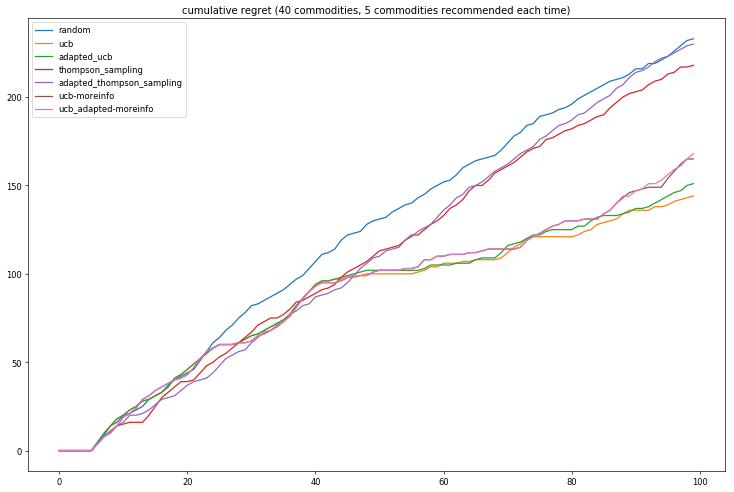

In [295]:
plt.figure(figsize=(15,10),dpi=60)
#plt.plot(np.cumsum(CM1.regret_history), label = 'random')
plt.plot(np.cumsum(C1.regret_history), label = 'random')

plt.plot(np.cumsum(CM2.regret_history), label = 'ucb')
plt.plot(np.cumsum(CM3.regret_history), label = 'adapted_ucb')
plt.plot(np.cumsum(CM4.regret_history), label = 'thompson_sampling')
plt.plot(np.cumsum(CM5.regret_history), label = 'adapted_thompson_sampling')

plt.plot(np.cumsum(C2.regret_history), label = 'ucb-moreinfo')
plt.plot(np.cumsum(C3.regret_history), label = 'ucb_adapted-moreinfo')

plt.title('cumulative regret (40 commodities, 5 commodities recommended each time)')
plt.legend()

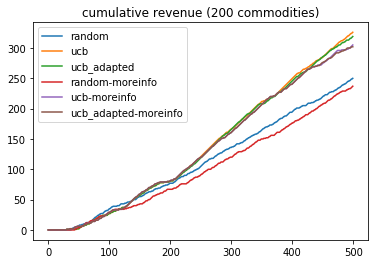

In [296]:
plt.plot(np.cumsum(CM1.revenue_history), label = 'random')
plt.plot(np.cumsum(CM2.revenue_history), label = 'ucb')
plt.plot(np.cumsum(CM3.revenue_history), label = 'ucb_adapted')

plt.plot(np.cumsum(C1.revenue_history), label = 'random-moreinfo')
plt.plot(np.cumsum(C2.revenue_history), label = 'ucb-moreinfo')
plt.plot(np.cumsum(C3.revenue_history), label = 'ucb_adapted-moreinfo')

plt.title('cumulative revenue (200 commodities)')
plt.legend()


In [285]:
np.random.choice([1,2,3], 2, replace=False)

array([1, 3])

In [31]:
C.update_desire(C.get_clients(1), rate_rise=0.5)

TypeError: only integer scalar arrays can be converted to a scalar index

In [32]:
C.desire_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [95]:
C.get_waiting_list(0)

array([], dtype=float64)

In [85]:
np.array([[1], [1,2]])

array([list([1]), list([1, 2])], dtype=object)

In [15]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.vstack([a,b])

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
a = 5
3<a<6

True